<a href="https://colab.research.google.com/github/Avonna/Avona/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_24_01_2023_SF_%D0%94%D0%B5%D0%BD%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Интенсив "Пишем рекомендательную систему как в YouTube (почти)"
## День 2

## Занимаемся обработкой текста

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("./video_dataset.csv")

In [ ]:
data_small = data.loc[:, ['id', 'title', 'description', 'thumbnail_medium', 'tags', 'views', 'likes']]

In [ ]:
data_small['like_ratio'] = data_small['likes']/data_small['views']

Обрабатывать текст будем с помощью библиотек nltk и sklearn.

Первая – библиотека специально для работы с текстами, вторая – общая библиотека алгоритмов машинного обучения.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
MIN_WORDS = 4
MAX_WORDS = 200

PATTERN_S = re.compile("\'s")  # matches `'s` from text  
PATTERN_RN = re.compile("\\r\\n") #matches `\r` and `\n`
PATTERN_PUNC = re.compile(r"[^\w\s]") # matches all non 0-9 A-z whitespace 

In [ ]:
def clean_text(text):
    text = text.lower()  
    # replace the matched string with ' '
    text = re.sub(PATTERN_S, ' ', text)
    text = re.sub(PATTERN_RN, ' ', text)
    text = re.sub(PATTERN_PUNC, ' ', text)
    return text

In [ ]:
def tokenizer(sentence, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS, lemmatize=True):
    if lemmatize:
        stemmer = WordNetLemmatizer()
        tokens = [stemmer.lemmatize(w) for w in word_tokenize(sentence)]
    else:
        tokens = [w for w in word_tokenize(sentence)]
    token = [w for w in tokens if (len(w) > min_words and len(w) < max_words
                                                        and w not in stopwords)]
    return tokens 

In [ ]:
def clean_sentences(df):
    print('Cleaning sentences...')
    df['clean_sentence'] = df['sentence'].apply(clean_text)
    df['tok_lem_sentence'] = df['clean_sentence'].apply(
        lambda x: tokenizer(x, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS))
    return df

In [ ]:
from ast import literal_eval

data_small['tags_text'] = data_small['tags'].apply(lambda x: ' '.join(literal_eval(x)) if isinstance(x, str) else '')

In [ ]:
def create_combined_data(x):
    result = x['description'] if isinstance(x['description'], str) else ''
    return result + ' ' + x['tags_text']

Мы подготовили наши функции для подготовки данных, теперь посмотрим как они работают.

In [ ]:
data_small['sentence'] = data_small.apply(create_combined_data, axis=1)

In [ ]:
data_clean = clean_sentences(data_small)

Cleaning sentences...


In [ ]:
data_clean

,id,title,description,thumbnail_medium,tags,views,likes,like_ratio,tags_text,sentence,clean_sentence,tok_lem_sentence
0,5q87K1WaoFI,Computer Scientist Explains Machine Learning i...,WIRED has challenged computer scientist and Hi...,https://i.ytimg.com/vi/5q87K1WaoFI/mqdefault.jpg,"['5 levels', '5 levels machine learning', '5 l...",1663663.0,49186.0,0.029565,5 levels 5 levels machine learning 5 levels of...,WIRED has challenged computer scientist and Hi...,wired has challenged computer scientist and hi...,"[wired, ha, challenged, computer, scientist, a..."
1,ukzFI9rgwfU,Machine Learning Basics | What Is Machine Lear...,🔥 Enroll for FREE Machine Learning Course & Ge...,https://i.ytimg.com/vi/ukzFI9rgwfU/mqdefault.jpg,"['machine learning', 'basics of machine learni...",3585951.0,44709.0,0.012468,machine learning basics of machine learning wh...,🔥 Enroll for FREE Machine Learning Course & Ge...,enroll for free machine learning course ge...,"[enroll, for, free, machine, learning, course,..."
2,7eh4d6sabA0,Python Machine Learning Tutorial (Data Science),Python Machine Learning Tutorial - Learn how ...,https://i.ytimg.com/vi/7eh4d6sabA0/mqdefault.jpg,"['machine learning python', 'machine learning ...",1772913.0,43341.0,0.024446,machine learning python machine learning tutor...,Python Machine Learning Tutorial - Learn how ...,python machine learning tutorial learn how ...,"[python, machine, learning, tutorial, learn, h..."
3,i_LwzRVP7bg,Machine Learning for Everybody – Full Course,Learn Machine Learning in a way that is access...,https://i.ytimg.com/vi/i_LwzRVP7bg/mqdefault.jpg,NaN,875008.0,16848.0,0.019255,,Learn Machine Learning in a way that is access...,learn machine learning in a way that is access...,"[learn, machine, learning, in, a, way, that, i..."
4,KNAWp2S3w94,Intro to Machine Learning (ML Zero to Hero - P...,Machine Learning represents a new paradigm in ...,https://i.ytimg.com/vi/KNAWp2S3w94/mqdefault.jpg,"['Coding TensorFlow', 'Machine learning zero t...",806825.0,17781.0,0.022038,Coding TensorFlow Machine learning zero to her...,Machine Learning represents a new paradigm in ...,machine learning represents a new paradigm in ...,"[machine, learning, represents, a, new, paradi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
207,B38aDwUpcFc,Django REST Framework Full Course For Beginner...,19 Hours Full Stack Course with Django REST Fr...,https://i.ytimg.com/vi/B38aDwUpcFc/mqdefault.jpg,['Django REST Framework Full Course For Beginn...,421148.0,8235.0,0.019554,Django REST Framework Full Course For Beginner...,19 Hours Full Stack Course with Django REST Fr...,19 hours full stack course with django rest fr...,"[19, hour, full, stack, course, with, django, ..."
208,3vfum74ggHE,I built the same app 3 times | Which Python Fr...,I built the same app 3 times with 3 different ...,https://i.ytimg.com/vi/3vfum74ggHE/mqdefault.jpg,"['Python', 'flask', 'django', 'fastapi']",470838.0,11390.0,0.024191,Python flask django fastapi,I built the same app 3 times with 3 different ...,i built the same app 3 times with 3 different ...,"[i, built, the, same, app, 3, time, with, 3, d..."
209,ojOzGuu5MFo,ЧТО ДОЛЖЕН ЗНАТЬ PYTHON BACKEND ДЖУН/СТАЖЁР,Всем привет! Продолжаю разгребать авгиевы коню...,https://i.ytimg.com/vi/ojOzGuu5MFo/mqdefault.jpg,"['python', 'backend', 'python junior', 'python...",24887.0,1593.0,0.064009,python backend python junior python стажёр нач...,Всем привет! Продолжаю разгребать авгиевы коню...,всем привет продолжаю разгребать авгиевы коню...,"[всем, привет, продолжаю, разгребать, авгиевы,..."
210,zuxzE7--RYM,Python Web Development | Web Development Using...,"🔥 Edureka Python Master Program (Use Code ""𝐘𝐎𝐔...",https://i.ytimg.com/vi/zuxzE7--RYM/mqdefault.jpg,"['yt:cc=on', 'python web development', 'web de...",1158631.0,19641.0,0.016952,yt:cc=on python web development web developmen...,"🔥 Edureka Python Master Program (Use Code ""𝐘𝐎𝐔...",edureka python master program use code 𝐘𝐎𝐔...,"[edureka, python, master, program, u

Посмотрим на пример того, что получилось:

In [ ]:
# Эта ячейка нужна для того, чтобы включить text wrapping в ноутбуке и удобнее смотреть на текст

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
for col_name in ['description', 'clean_sentence', 'tok_lem_sentence']:
    print(data_clean.loc[0, col_name])
    print("---")

WIRED has challenged computer scientist and Hidden Door cofounder and CEO Hilary Mason to explain machine learning to 5 different people; a child, teen, a college student, a grad student and an expert.

Still haven’t subscribed to WIRED on YouTube? ►► http://wrd.cm/15fP7B7 
Listen to the Get WIRED podcast  ►► https://link.chtbl.com/wired-ytc-desc
Want more WIRED? Get the magazine ►► https://subscribe.wired.com/subscribe/splits/wired/WIR_YouTube?source=EDT_WIR_YouTube_0_Video_Description_ZZ

Get more incredible stories on science and tech with our daily newsletter: https://wrd.cm/DailyYT

Also, check out the free WIRED channel on Roku, Apple TV, Amazon Fire TV, and Android TV. Here you can find your favorite WIRED shows and new episodes of our latest hit series Tradecraft.

ABOUT WIRED
WIRED is where tomorrow is realized. Through thought-provoking stories and videos, WIRED explores the future of business, innovation, and culture.

Computer Scientist Explains Machine Learning in 5 Levels

### Как сравнивать числа

Мы собираемся превратить наши описания видео в наборы чисел, чтобы компьютер смог их понимать. 

При этом, нам нужно иметь возможность сравнивать эти наборы чисел, чтобы находить среди них похожие – так мы будем определять, похожи ли видео друг на друга и получим возможность делать рекомендации.

Набор чисел – это вектор в каком-то пространстве, близость векторов можно сравнивать с помощью косинусного расстояния.

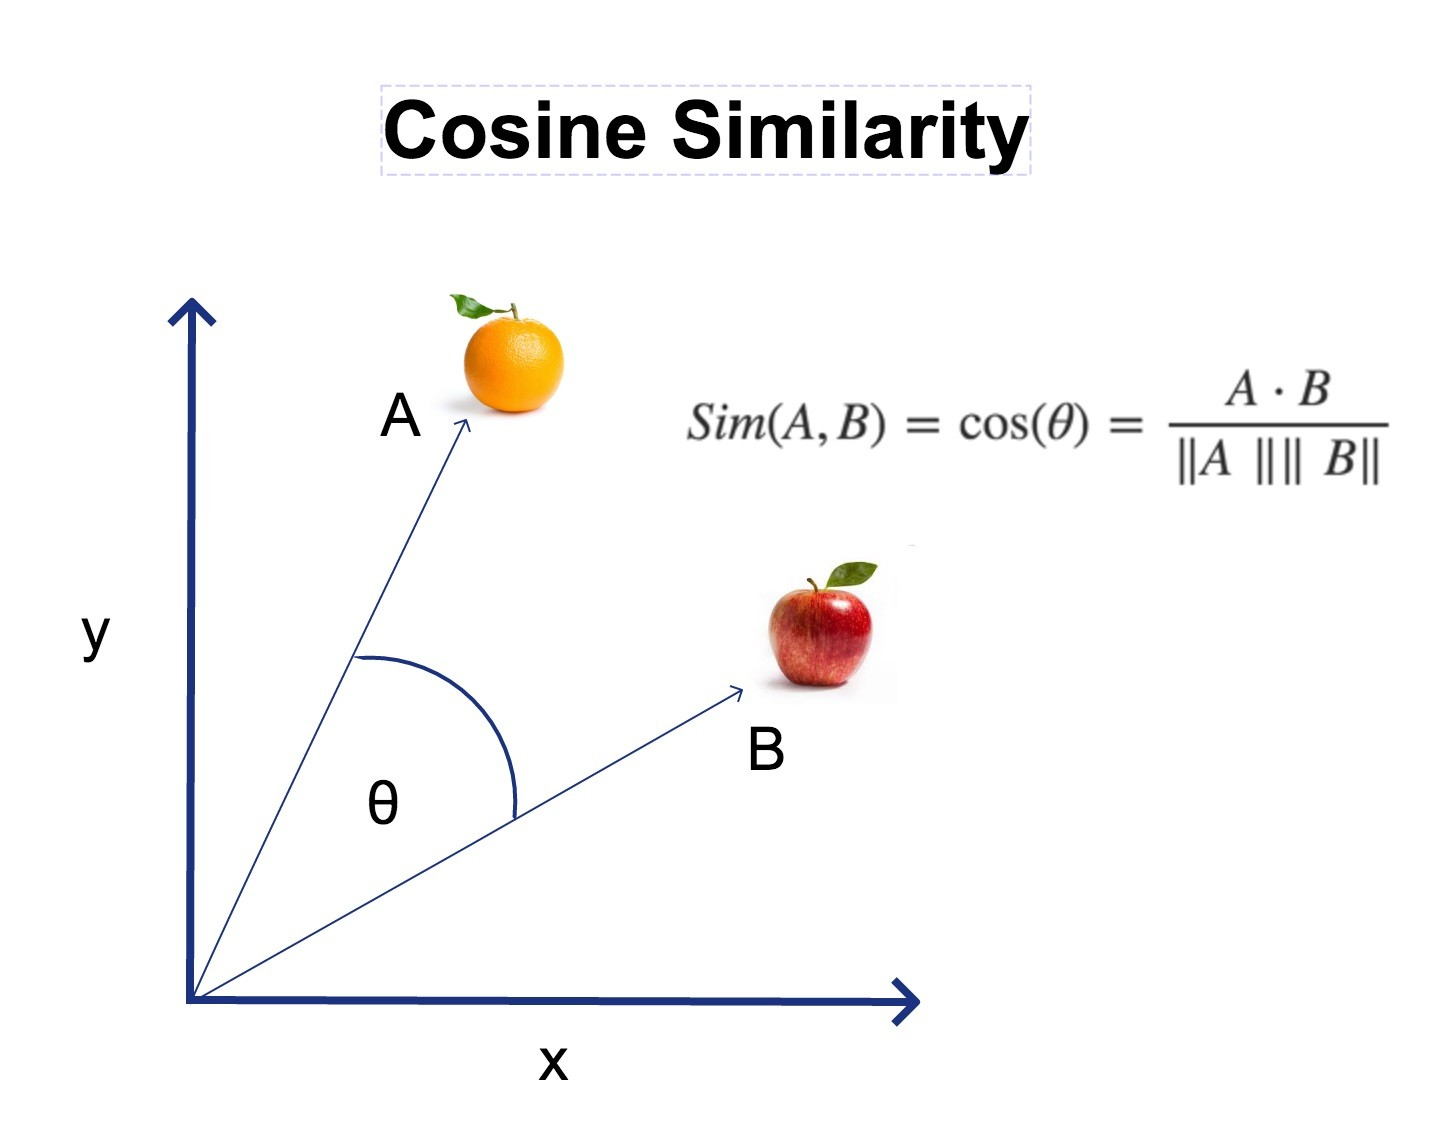

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_best_indices(m, topk, mask=None):
    if len(m.shape) > 1:
        cos_sim = np.mean(m, axis=0) 
    else: 
        cos_sim = m

    index = np.argsort(cos_sim)[::-1] 
    if mask is not None:
        assert mask.shape == m.shape
        mask = mask[index]
    else:
        mask = np.ones(len(cos_sim))
    mask = np.logical_or(cos_sim[index] != 0, mask) 
    best_index = index[mask][:topk]  
    return best_index

### Попробуем сделать предсказание с помощью TF-IDF

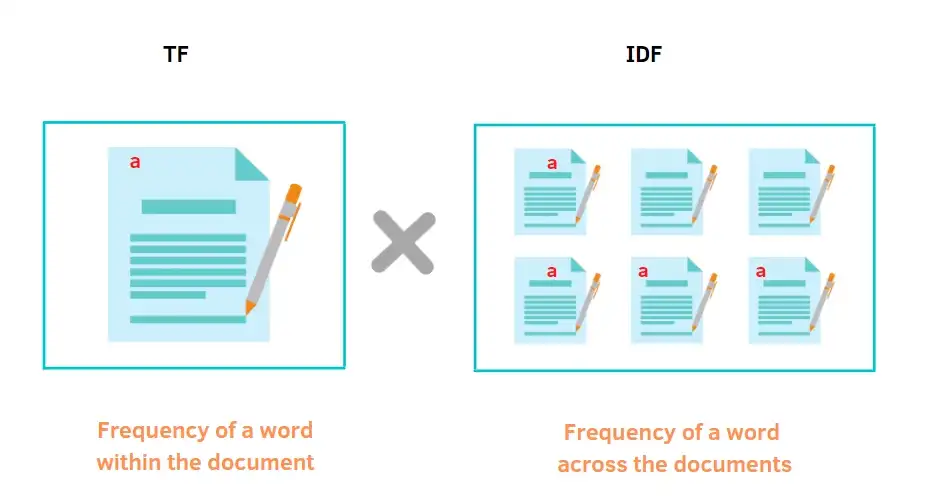

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def get_recommendations_tfidf(sentence, tfidf_mat):

    tokens_query = [str(tok) for tok in tokenizer(sentence)]
    embed_query = vectorizer.transform(tokens_query)

    mat = cosine_similarity(embed_query, tfidf_mat)

    best_index = extract_best_indices(mat, topk=3)
    return best_index

token_stop = tokenizer(' '.join(STOPWORDS), lemmatize=False)

vectorizer = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer) 
tfidf_mat = vectorizer.fit_transform(data_small['sentence'].values) 

test_sentence = 'Basics of Data Science' 
best_index = get_recommendations_tfidf(test_sentence, tfidf_mat)

display(data_small[['title', 'sentence']].iloc[best_index]);

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


,title,sentence
122,Data Analytics with Python | Python for Data A...,🔵 Intellipaat Data Analytics training course: ...
108,Data Analytics Using Python And SQL 2022 | Dat...,🔥Data Analyst Master's Program (Discount Coupo...
107,Data Analytics With Python | Data Analysis Wit...,Data analytics plays a vital role in every com...


### Word2Vec

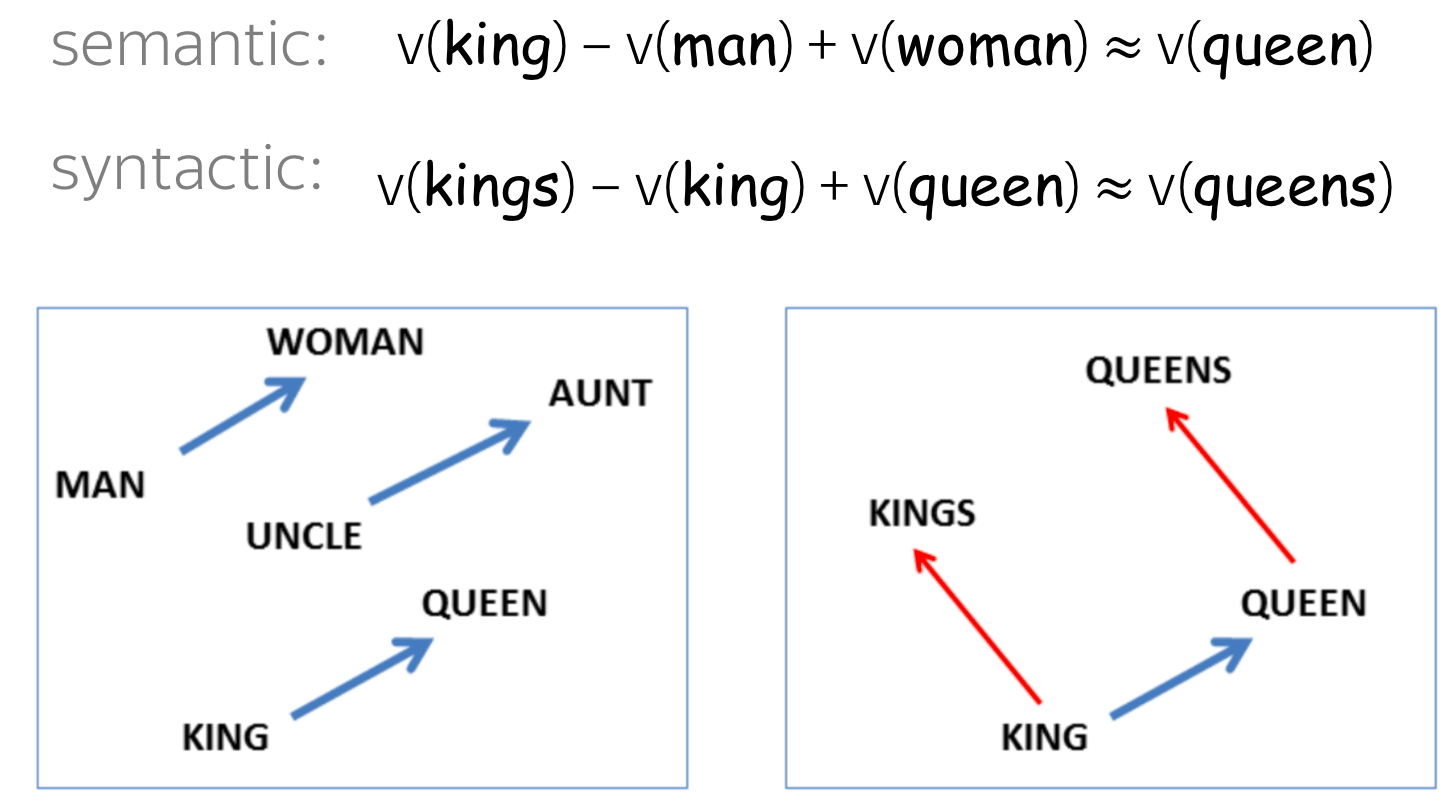

In [ ]:
from gensim.models.word2vec import Word2Vec

def is_word_in_model(word, model):
    is_in_vocab = word in model.wv.vocab.keys()
    return is_in_vocab

In [ ]:
def predict_w2v(query_sentence, dataset, model, topk=3):
    query_sentence = query_sentence.split()
    in_vocab_list, best_index = [], [0]*topk
    for w in query_sentence:
        if is_word_in_model(w, model.wv):
            in_vocab_list.append(w)

    if len(in_vocab_list) > 0:
        sim_mat = np.zeros(len(dataset))  
        for i, data_sentence in enumerate(dataset):
            if data_sentence:
                sim_sentence = model.wv.n_similarity(
                        in_vocab_list, data_sentence)
            else:
                sim_sentence = 0
            sim_mat[i] = np.array(sim_sentence)

        best_index = np.argsort(sim_mat)[::-1][:topk]
    return best_index

In [ ]:
word2vec_model = Word2Vec(min_count=0, workers = 8) 

word2vec_model.build_vocab(data_clean.tok_lem_sentence.values)

word2vec_model.train(data_clean.tok_lem_sentence.values, total_examples=word2vec_model.corpus_count, epochs=30)

(1495501, 1859970)

In [ ]:
test_sentence = 'SQL with java' 
best_index = predict_w2v(test_sentence, data_clean['tok_lem_sentence'].values, word2vec_model)    
display(data_small[['title', 'sentence']].iloc[best_index]);

<ipython-input-53-c478aec367ce>:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  is_in_vocab = word in model.wv.vocab.keys()


,title,sentence
173,"Java JDBC CRUD Tutorial (SQL Insert, Select, U...",Learn how to write Java code that manages info...
167,Java JDBC - Connect to MySQL Database in Intel...,Hey everyone and welcome to WittCode! In this ...
181,Java Connect to MySQL Database Step by Step,Learn to write Java code that connects to a My...


### spaCy

В примере выше нам нужно было самим почистить данные, токенизировать и лемматизировать их. Затем, мы вручную обучили Word2Vec на имеющихся у нас данных и это означает, что модель выше просто не понимала те слова, которые не видела на этапе обучения.

К счастью, уже существуют предобученные модели, которые можно просто использовать.

Более того, с помощью библиотеки spaCy нам даже не нужно заниматься первичной предобработкой данных, она все делает за нас.

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
def predict_spacy(model, query_sentence, embed_mat, topk=3):
    query_embed = model(query_sentence)
    mat = np.array([query_embed.similarity(line) for line in embed_mat])

    mat_mask = np.array(
        [True if line.vector_norm else False for line in embed_mat])
    best_index = extract_best_indices(mat, topk=topk, mask=mat_mask)
    return best_index

In [ ]:
nlp = spacy.load("en_core_web_lg") 

data_clean['spacy_sentence'] = data_clean['sentence'].apply(lambda x: nlp(x))

In [ ]:
embed_mat = data_clean['spacy_sentence'].values

test_sentence = 'SQL with java' 
best_index = predict_spacy(nlp, test_sentence, embed_mat)

display(data_small[['title', 'sentence']].iloc[best_index]);

<ipython-input-60-582e988ca4b1>:10: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  mat = np.array([query_embed.similarity(line) for line in embed_mat])


,title,sentence
163,Java Connect to Microsoft SQL Server Step by Step,Learn to write Java code that connects to Micr...
168,"Java - Connection to SQL Server, downloading a...",This demo shows how to connect to SQL Server f...
181,Java Connect to MySQL Database Step by Step,Learn to write Java code that connects to a My...


## Дополнительный материал: Коллаборативная фильтрация

В предыдущей модели (content-based рекомендации) мы не учитывали поведение пользователей, так как смотрели только на похожесть объектов между собой.  

Коллаборативная фильтрация работает лучше, так как мы можем использовать предыдущий подход и применить его к пользователям: собрать всех пользователей в одну матрицу и посчитать, какие пользователи похожи между собой.

### Memory-based подход

Есть несколько способов применения коллаборативной фильтрации.  
Один из них – подход, основанный на памяти. Этот подход подразумевает, что мы не используем никаких моделей для расчетов рекомендаций: все необходимые данные мы храним в одной таблице и они все должны находиться в памяти для создания рекомендации.

В данном подходе мы можем составить матрицу из действий пользователей, а затем сравнить пользователей с помощью какой-нибудь функции. Например, все той же косинусной метрикой.

Недостатком такого метода является то, что при добавлении нового пользователя нам нужно заново строить матрицу. При этом, матрица будет разреженная (так как пользователей и фильмов может быть много), поэтому вычисления с ней будут более трудные.

Подготовим необходимые данные и функции:

In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict

NUM_USERS = 10_000
NUM_ITEMS = 1_000
USER_COL = 'user_id'
ITEM_COL = 'item_id'
RATING_COL = 'rating'
user_id = np.arange(start = 0, stop = NUM_USERS)
item_id = np.arange(start = 0, stop = NUM_ITEMS)
np.random.seed(42)

user_item_dict = defaultdict(list)
genres = ['Action', 'Comedy', 'Drama', 'Fantasy', 'Horror', 
          'Mystery', 'Romance', 'Thriller', 'Western']

for id in user_id:
    num_rand_item = np.random.randint(low = 3, high = 5)
    rand_items = np.random.choice(item_id, size = num_rand_item, replace = False)
    rand_rating = np.random.randint(low = 1, high = 10, size = num_rand_item)

    for uid, iid,rating in zip([id] * num_rand_item, rand_items, rand_rating):
        user_item_dict['user_id'].append(uid)
        user_item_dict['item_id'].append(iid)
        user_item_dict['rating'].append(rating)

ratings = pd.DataFrame(user_item_dict)
ratings[['user_id', 'item_id']] = ratings[['user_id', 'item_id']].astype(str)

item_genre_dict = defaultdict(list)
for iid in item_id:
    num_rand_genre = np.random.randint(low = 1, high = 3)
    rand_genres = np.random.choice(genres, size = num_rand_genre, replace = False)
    item_genre_dict['item_id'].append(iid)
    item_genre_dict['genres'].append(', '.join(list(rand_genres)))

items = pd.DataFrame(item_genre_dict)
items = items.astype(str)

def top_k_items(item_id, top_k, corr_mat, map_name):
    top_items = corr_mat[item_id,:].argsort()[-top_k:][::-1] 
    top_items = [map_name[e] for e in top_items] 

    return top_items

rated_items = items.loc[items[ITEM_COL].isin(ratings[ITEM_COL])].copy()
genre = rated_items['genres'].str.split(",", expand=True)

all_genre = set()
for c in genre.columns:
    distinct_genre = genre[c].str.lower().str.strip().unique()
    all_genre.update(distinct_genre)
all_genre.remove(None)

item_genre_mat = rated_items[[ITEM_COL, 'genres']].copy()
item_genre_mat['genres'] = item_genre_mat['genres'].str.lower().str.strip()

for genre in all_genre:
    item_genre_mat[genre] = np.where(item_genre_mat['genres'].str.contains(genre), 1, 0)
item_genre_mat = item_genre_mat.drop(['genres'], axis=1)
item_genre_mat = item_genre_mat.set_index(ITEM_COL)

ind2name = {ind:name for ind, name in enumerate(item_genre_mat.index)}
name2ind = {v:k for k, v in ind2name.items()}

In [ ]:
from scipy.sparse import csr_matrix

row = ratings[USER_COL]
col = ratings[ITEM_COL]
data = ratings[RATING_COL]

mat = csr_matrix((data, (row, col)), shape=(NUM_USERS, NUM_ITEMS))
mat.eliminate_zeros()

sparsity = float(len(mat.nonzero()[0]))
sparsity /= (mat.shape[0] * mat.shape[1])
sparsity *= 100
print(f'Sparsity: {sparsity:4.2f}%. Это значит, что {sparsity:4.2f}% ячеек в нашей таблице пользователь-фильм имеют какое-то значение.')

Sparsity: 0.35%. Это значит, что 0.35% ячеек в нашей таблице пользователь-фильм имеют какое-то значение.


In [ ]:
item_corr_mat = cosine_similarity(mat.T)

print("\nТоп-10 похожих фильмов на фильм под номером 99:")
similar_items = top_k_items(name2ind['99'],
                            top_k = 10,
                            corr_mat = item_corr_mat,
                            map_name = ind2name)

display(items.loc[items[ITEM_COL].isin(similar_items)])


Топ-10 похожих фильмов на фильм под номером 99:


,item_id,genres
99,99,"Romance, Action"
248,248,Horror
352,352,"Romance, Action"
392,392,"Romance, Action"
507,507,"Horror, Western"
570,570,Horror
730,730,Fantasy
757,757,"Romance, Thriller"
824,824,Fantasy
899,899,Comedy


In [ ]:
genres_99 = item_genre_mat.iloc[99, :]
print("Жанры фильма под номером 99:")
list(genres_99[np.where(genres_99 > 0)[0]].keys())

Жанры фильма под номером 99:


['romance', 'action']

### Model-based подход

Мы уже рассмотрели недостаток memory-based подхода: все приходится держать в памяти, поддерживать такую систему сложно.  
Model-based подход заключается в построении модели, которая будет заниматься предсказанием. Алгоритмов, основанных на model-based подходе, много. Мы рассмотрим один из них.

#### Truncated SVD

Многие подходы так или иначе используют преобразования матриц (например, разложение или уменьшение размерности). Это помогает сократить вычисления и хранить меньше информации в памяти. 

В данном случае мы будем использовать TruncatedSVD в качестве алгоритма уменьшения размерности. SVD (Singular Value Decomposition) позволяет уменьшить размерность матрицы и эффективно работает с разреженными матрицами – у нас как раз такая.

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_latent_factors = 10

item_svd = TruncatedSVD(n_components = n_latent_factors)
item_features = item_svd.fit_transform(mat.transpose()) 

item_corr_mat = cosine_similarity(item_features)

print("\nТоп-10 похожих фильмов на фильм под номером 99:")
similar_items = top_k_items(name2ind['99'],
                            top_k = 10,
                            corr_mat = item_corr_mat,
                            map_name = ind2name)

display(items.loc[items[ITEM_COL].isin(similar_items)])


Топ-10 похожих фильмов на фильм под номером 99:


,item_id,genres
99,99,"Romance, Action"
346,346,"Drama, Action"
352,352,"Romance, Action"
359,359,"Horror, Mystery"
392,392,"Romance, Action"
409,409,Mystery
797,797,"Western, Drama"
885,885,Romance
903,903,Thriller
999,999,Fantasy
